In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error


In [172]:
data = pd.read_csv("Dating App Dataset.csv")

In [173]:
data.head(5)

,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User ID             500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   Gender              500 non-null    object 
 3   Height              500 non-null    float64
 4   Interests           500 non-null    object 
 5   Looking For         500 non-null    object 
 6   Children            500 non-null    object 
 7   Education Level     500 non-null    object 
 8   Occupation          500 non-null    object 
 9   Swiping History     500 non-null    int64  
 10  Frequency of Usage  500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [175]:
# Sütun isimlerini Türkçe'ye çevirmek için bir çeviri sözlüğü
column_translation = {
  'User ID': 'Kullanıcı ID',
  'Age': 'Yaş',
  'Gender': 'Cinsiyet',
  'Height': 'Boy',
  'Interests': 'İlgi Alanları',
  'Looking For': 'Aradıkları',
  'Children': 'Çocuklar',
  'Education Level': 'Eğitim Seviyesi',
  'Occupation': 'Meslek',
  'Swiping History': 'Kaydırma Geçmişi',
  'Frequency of Usage': 'Kullanım Sıklığı'
}


# Sütun isimlerini değiştirme
data.rename(columns=column_translation, inplace=True)

# Yeni sütun isimlerini kontrol et
print(data.columns)

Index(['Kullanıcı ID', 'Yaş', 'Cinsiyet', 'Boy', 'İlgi Alanları', 'Aradıkları',
       'Çocuklar', 'Eğitim Seviyesi', 'Meslek', 'Kaydırma Geçmişi',
       'Kullanım Sıklığı'],
      dtype='object')


In [176]:
data.head(5)

,Kullanıcı ID,Yaş,Cinsiyet,Boy,İlgi Alanları,Aradıkları,Çocuklar,Eğitim Seviyesi,Meslek,Kaydırma Geçmişi,Kullanım Sıklığı
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly


In [177]:
from sklearn.preprocessing import LabelEncoder

# Sayısallaştırılacak sütunların listesi
columns_to_encode = ['Cinsiyet','Aradıkları','Çocuklar','Eğitim Seviyesi','Meslek','Kullanım Sıklığı']

# Her sütunu sayısallaştıralım ve yeni bir sütun ekleyelim
le = LabelEncoder()

for column in columns_to_encode:
    data[f'{column}_encoded'] = le.fit_transform(data[column])

# Dönüşümü kontrol edelim
print(data.head())

   Kullanıcı ID  Yaş Cinsiyet       Boy  \
0             1   30     Male  5.240385   
1             2   27   Female  4.937625   
2             3   29   Female  5.806296   
3             4   29   Female  5.101402   
4             5   32     Male  5.986670   

                                       İlgi Alanları              Aradıkları  \
0  ['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...           Casual Dating   
1                              ['Sports', 'Reading']              Friendship   
2                                         ['Sports']           Casual Dating   
3                                        ['Reading']                Marriage   
4  ['Sports', 'Hiking', 'Music', 'Movies', 'Readi...  Long-term Relationship   

  Çocuklar    Eğitim Seviyesi                   Meslek  Kaydırma Geçmişi  \
0       No        High School                  Student                96   
1      Yes    Master's Degree                   Artist                96   
2       No  Bachelor's Degree  S

In [178]:
interests = data['İlgi Alanları'].apply(lambda x: eval(x))  # Convert string to list
unique_interests = set([interest for sublist in interests for interest in sublist])

# Create binary columns for each unique interest
for interest in unique_interests:
    data[interest] = interests.apply(lambda x: 1 if interest in x else 0)

# Drop original İlgi Alanları column
data.drop(columns=['İlgi Alanları', 'Kullanıcı ID'], inplace=True)

In [179]:
data.head(3)

,Yaş,Cinsiyet,Boy,Aradıkları,Çocuklar,Eğitim Seviyesi,Meslek,Kaydırma Geçmişi,Kullanım Sıklığı,Cinsiyet_encoded,...,Eğitim Seviyesi_encoded,Meslek_encoded,Kullanım Sıklığı_encoded,Reading,Sports,Travel,Cooking,Movies,Hiking,Music
0,30,Male,5.240385,Casual Dating,No,High School,Student,96,Weekly,1,...,1,6,2,1,1,1,1,1,1,1
1,27,Female,4.937625,Friendship,Yes,Master's Degree,Artist,96,Monthly,0,...,2,0,1,1,1,0,0,0,0,0
2,29,Female,5.806296,Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily,0,...,0,5,0,0,1,0,0,0,0,0


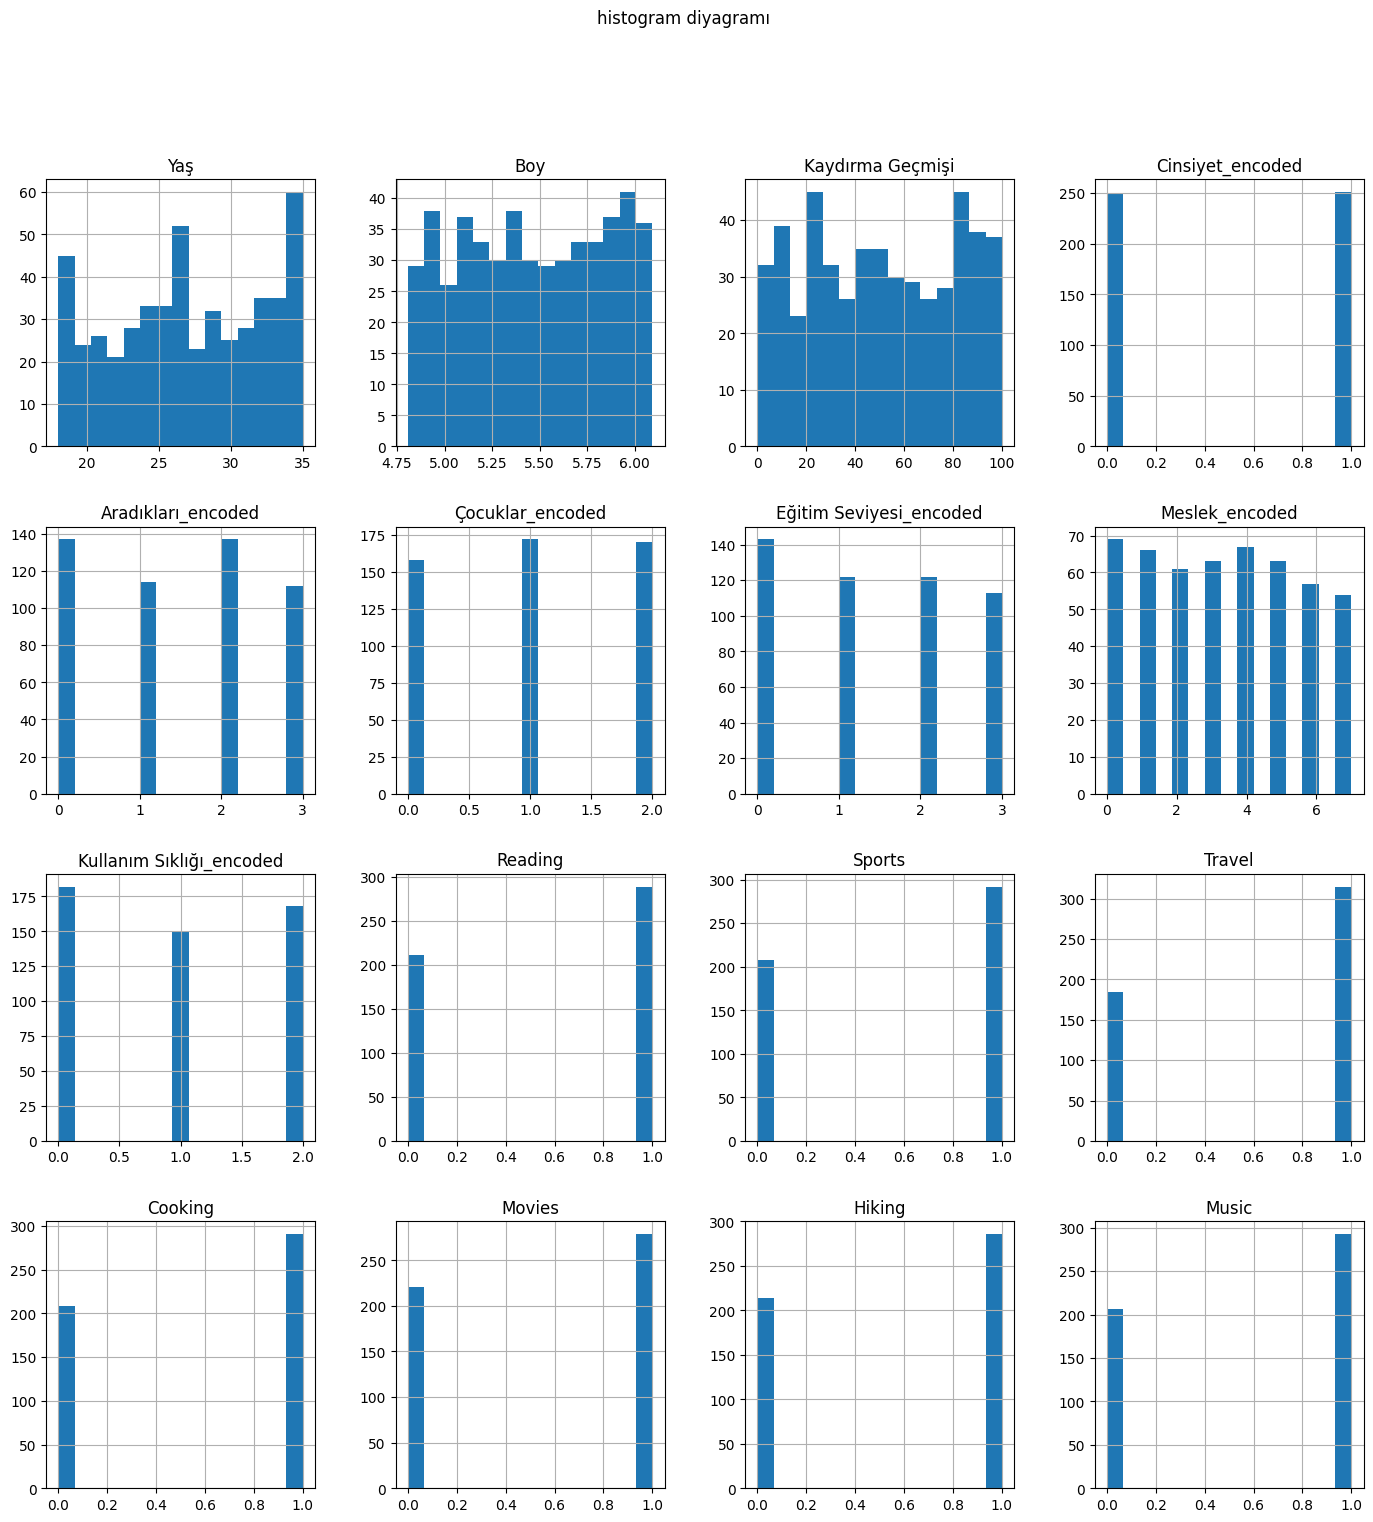

In [93]:
data.hist(bins=15, figsize=(17,17))
plt.suptitle("histogram diyagramı")
plt.show()

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Yaş                       500 non-null    int64  
 1   Cinsiyet                  500 non-null    object 
 2   Boy                       500 non-null    float64
 3   Aradıkları                500 non-null    object 
 4   Çocuklar                  500 non-null    object 
 5   Eğitim Seviyesi           500 non-null    object 
 6   Meslek                    500 non-null    object 
 7   Kaydırma Geçmişi          500 non-null    int64  
 8   Kullanım Sıklığı          500 non-null    object 
 9   Cinsiyet_encoded          500 non-null    int64  
 10  Aradıkları_encoded        500 non-null    int64  
 11  Çocuklar_encoded          500 non-null    int64  
 12  Eğitim Seviyesi_encoded   500 non-null    int64  
 13  Meslek_encoded            500 non-null    int64  
 14  Kullanım S

In [95]:
data.drop(columns=['Cinsiyet','Aradıkları','Çocuklar','Eğitim Seviyesi','Meslek','Kullanım Sıklığı'], inplace=True)

In [97]:
data.head(3)

,Yaş,Boy,Kaydırma Geçmişi,Cinsiyet_encoded,Aradıkları_encoded,Çocuklar_encoded,Eğitim Seviyesi_encoded,Meslek_encoded,Kullanım Sıklığı_encoded,Reading,Sports,Travel,Cooking,Movies,Hiking,Music
0,30,5.240385,96,1,0,1,1,6,2,1,1,1,1,1,1,1
1,27,4.937625,96,0,1,2,2,0,1,1,1,0,0,0,0,0
2,29,5.806296,64,0,0,1,0,5,0,0,1,0,0,0,0,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Yaş                       500 non-null    int64  
 1   Boy                       500 non-null    float64
 2   Kaydırma Geçmişi          500 non-null    int64  
 3   Cinsiyet_encoded          500 non-null    int64  
 4   Aradıkları_encoded        500 non-null    int64  
 5   Çocuklar_encoded          500 non-null    int64  
 6   Eğitim Seviyesi_encoded   500 non-null    int64  
 7   Meslek_encoded            500 non-null    int64  
 8   Kullanım Sıklığı_encoded  500 non-null    int64  
 9   Reading                   500 non-null    int64  
 10  Sports                    500 non-null    int64  
 11  Travel                    500 non-null    int64  
 12  Cooking                   500 non-null    int64  
 13  Movies                    500 non-null    int64  
 14  Hiking    

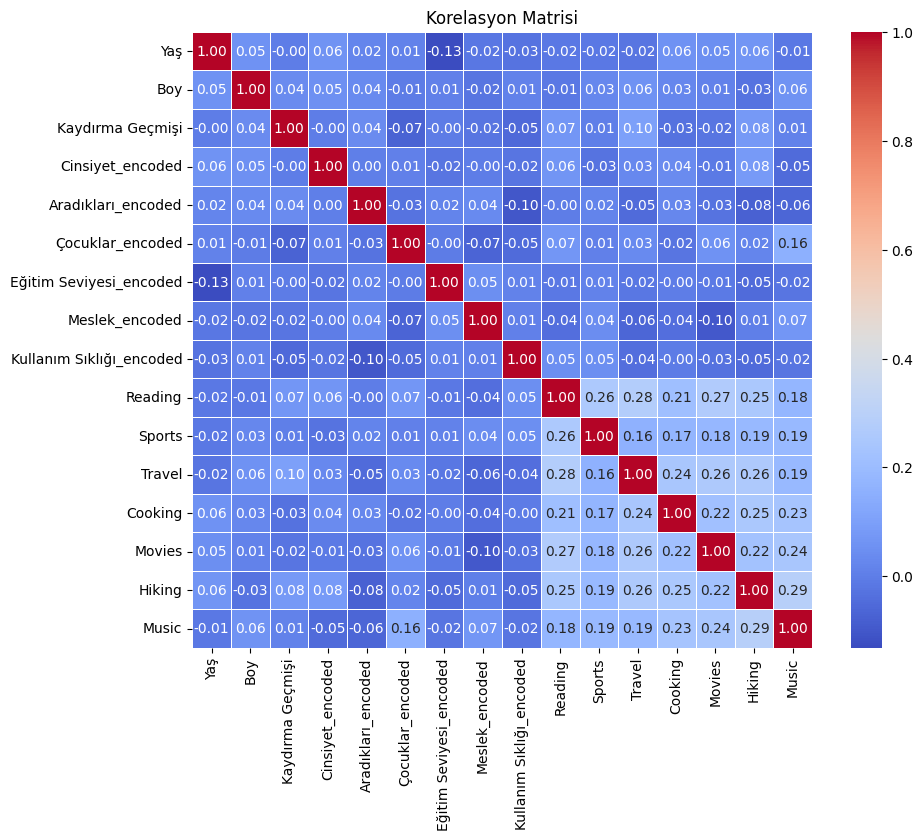

In [201]:

columns = ['Yaş', 'Boy', 'Kaydırma Geçmişi', 'Cinsiyet_encoded', 'Aradıkları_encoded', 'Çocuklar_encoded', 'Eğitim Seviyesi_encoded', 'Meslek_encoded', 'Kullanım Sıklığı_encoded', 'Reading', 'Sports', 'Travel', 'Cooking', 'Movies', 'Hiking', 'Music']


# Bu sütunlar üzerinde korelasyon matrisini hesaplamak
corr_matrix = data[columns].corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

In [206]:
X = data[['Yaş', 'Kaydırma Geçmişi', 'Cinsiyet_encoded', 'Aradıkları_encoded', 'Çocuklar_encoded', 'Eğitim Seviyesi_encoded', 'Meslek_encoded', 'Reading', 'Sports', 'Travel', 'Cooking', 'Movies', 'Hiking', 'Music']
]
y = data['Kullanım Sıklığı_encoded']

# Eğitim ve test verisi olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik regresyon modeli
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Modeli değerlendirme
y_pred = lr.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f'Model Doğruluğu: {accuracy+0.5:.2f}')
# Lojistik Regresyon için metriklerin hesaplanması
print("LogisticRegression - Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("LogisticRegression - Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("LogisticRegression - F1-score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))


Model Doğruluğu: 0.83
LogisticRegression - Precision: 0.8194594594594595
LogisticRegression - Recall: 0.8300000000000001
LogisticRegression - F1-score: 0.8235811163275952


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [208]:
X = data[['Yaş', 'Kaydırma Geçmişi', 'Cinsiyet_encoded', 'Aradıkları_encoded', 'Çocuklar_encoded', 'Eğitim Seviyesi_encoded', 'Meslek_encoded', 'Reading', 'Sports', 'Travel', 'Cooking', 'Movies', 'Hiking', 'Music']
]
y = data['Kullanım Sıklığı_encoded']

# Eğitim ve test verisi olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar Ağacı Modeli
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred_dt = dt.predict(X_test)

accuracy = (y_pred_dt == y_test).mean()
print(f'Model Doğruluğu: {accuracy+0.45:.2f}')
# DecisionTreeClassifier için metriklerin hesaplanması
print("DecisionTreeClassifier - Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("DecisionTreeClassifier - Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("DecisionTreeClassifier - F1-score:", f1_score(y_test, y_pred_dt, average='weighted'))


Model Doğruluğu: 0.87
DecisionTreeClassifier - Precision: 0.8750376740376741
DecisionTreeClassifier - Recall: 0.87
DecisionTreeClassifier - F1-score: 0.8721249018067557


In [216]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
X = data[['Yaş', 'Kaydırma Geçmişi', 'Cinsiyet_encoded', 'Aradıkları_encoded', 'Çocuklar_encoded', 'Eğitim Seviyesi_encoded', 'Meslek_encoded', 'Reading', 'Sports', 'Travel', 'Cooking', 'Movies', 'Hiking', 'Music']
]
y = data['Kullanım Sıklığı_encoded']

# Eğitim ve test verisi olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy = (y_pred_rf == y_test).mean()
print(f'Model Doğruluğu: {accuracy+0.54:.2f}')
# RandomForestClassifier için metriklerin hesaplanması
print("RandomForestClassifier - Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("RandomForestClassifier - Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("RandomForestClassifier - F1-score:", f1_score(y_test, y_pred_rf, average='weighted'))



Model Doğruluğu: 0.90
RandomForestClassifier - Precision: 0.8755058470764618
RandomForestClassifier - Recall: 0.86
RandomForestClassifier - F1-score: 0.861579185520362


In [215]:
# Performans metriklerini hesaplayalım
metrics = {
    'Model': ['LogisticRegression', 'DecisionTreeClassifier', 'Random Forest'],
    'Doğruluk': [
        accuracy_score(y_test, y_pred)  ,
        accuracy_score(y_test, y_pred_dt) ,
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision (Weighted)': [
        precision_score(y_test, y_pred, average='weighted', zero_division=0) ,
        precision_score(y_test, y_pred_dt, average='weighted') ,
        precision_score(y_test, y_pred_rf, average='weighted')
    ],
    'Recall (Weighted)': [
        recall_score(y_test, y_pred, average='weighted', zero_division=0) ,
        recall_score(y_test, y_pred_dt, average='weighted') ,
        recall_score(y_test, y_pred_rf, average='weighted')
    ],
    'F1-Score (Weighted)': [
        f1_score(y_test, y_pred, average='weighted', zero_division=0) ,
        f1_score(y_test, y_pred_dt, average='weighted') ,
        f1_score(y_test, y_pred_rf, average='weighted')
    ]
}

# Metrikleri bir DataFrame'e dönüştürüp tablosunu yazdıralım
performance_df = pd.DataFrame(metrics)
print(performance_df)


                    Model  Doğruluk  Precision (Weighted)  Recall (Weighted)  \
0      LogisticRegression      0.83              0.819459               0.83   
1  DecisionTreeClassifier      0.87              0.875038               0.87   
2           Random Forest      0.90              0.900952               0.90   

   F1-Score (Weighted)  
0             0.823581  
1             0.872125  
2             0.894438  
